In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.projections.polar
import os

from itertools import product, count
from typing import List


In [2]:
df = pd.read_csv('./results_direct/metrics3.csv')
df.columns = [c.strip() for c in df.columns]
df['dataset_name'] = df['dataset_name'].str.strip()
df['test_name'] = df['test_name'].str.strip()

df['CC_train'] = (df['CC_train'] + 1) / 2
df['R_train'] = (df['R_train'] + 1) / 2
df.drop('MSE_train', axis=1, inplace=True)

df.head()

,dataset_name,test_name,T_train,C_train,R_train,S_train,N_train,DSC_train,CC_train
0,mnist,ShRiNP-GT,0.736,0.900,0.6250,0.858,0.973,0.947,0.3580
1,mnist,ShRiNP-KMeans,0.858,0.912,0.5985,0.860,0.727,0.616,0.4610
2,mnist,ShRiNP-AG,0.829,0.914,0.6015,0.863,0.792,0.663,0.3395
3,mnist,SSNP-GT,0.786,0.920,0.6975,0.605,0.993,0.924,0.7935
4,mnist,SSNP-KMeans,0.882,0.909,0.5910,0.349,0.773,0.527,0.1820


In [3]:
datasets = ["mnist", "fashionmnist", "har", "reuters", "usps"]
algs = [
    "ShRiNP-GT",
    "ShRiNP-KMeans",
    "ShRiNP-AG",
    "SSNP-GT",
    # "SSNP-KMeans",
    # "SSNP-AG",
    "AE",
    "TSNE",
    "UMAP",
    # "NNP",
]
metrics = ["T_train", "C_train", "R_train", "S_train", "N_train", "DSC_train", "CC_train"]

pretty_datasets = {
    "mnist": "MNIST",
    "fashionmnist": "F_MNIST",
    "har": "HAR",
    "reuters": "Reuters",
    "usps": "USPS",
}
# noop
pretty_algs = {k: k for k in algs}
pretty_metrics = {
    "T_train": "Trustworthiness",
    "C_train": "Continuity",
    "R_train": "RankCorrelation",
    "S_train": "Stress",
    "N_train": "NeighborhoodHit",
    "DSC_train": "DistanceConsistency",
    "CC_train": "ClusterSizeConsistency",
}
short_metrics = {k: k.split('_')[0] for k in metrics}

In [4]:
n_rows = len(datasets)
n_cols = len(algs)
n_metrics = len(metrics)


angles = np.linspace(0, 2 * np.pi, n_metrics, endpoint=False).tolist()
angles += angles[:1]


def plot_star(ax: plt.Axes, values: List[float], star_indices: List[int] = [], fillcolor="blue"):
    values += values[:1]
    if len(star_indices) > 0:
        ax.plot(angles, values, "-o", markevery=star_indices, mfc="r", ms=8.0)
    else:
        ax.plot(angles, values)
    ax.fill(angles, values, color=fillcolor, alpha=0.25)


grouped = df.groupby(["dataset_name", "test_name"])


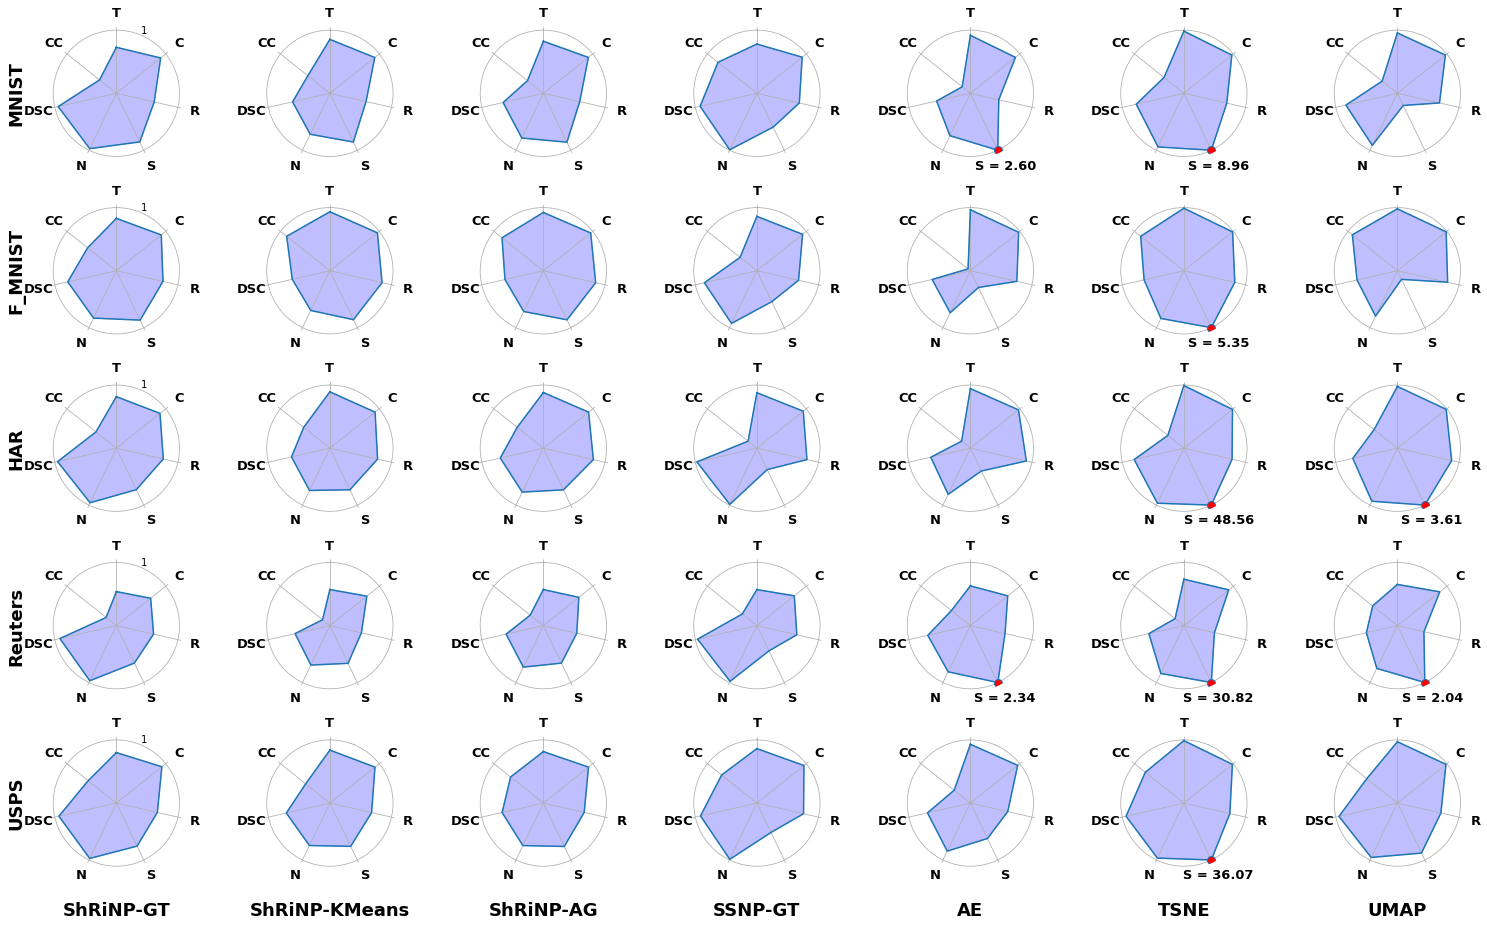

In [5]:
fig, axes = plt.subplots(n_rows, n_cols, sharey=True, subplot_kw=dict(polar=True), figsize=(21, 13))

for i, group_name in enumerate(product(datasets, algs)):
    row, col = divmod(i, n_cols)
    ax: matplotlib.projections.polar.PolarAxes = axes[row][col]
    ax.set_rgrids([0, 1])
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), short_metrics.values())

    group = grouped.get_group(group_name)
    vals = group[metrics].to_numpy()[0].tolist()
    if vals[3] >= 1.0:
        # prevent high stress values from making the plot unreadable
        stress_value = vals[3]
        vals[3] = 1.0
        plot_star(axes[row][col], vals, star_indices=[3])
        labels = ax.get_xticklabels()
        labels[3].set_text(f"S = {stress_value:.2f}")
        ax.set_xticklabels(labels)
    else:
        plot_star(axes[row][col], vals)

    for label in ax.get_xticklabels():
        label.set_fontweight("bold")

    if col == 0:
        ax.set_ylabel(
            pretty_datasets[group_name[0]],
            labelpad=25,
            fontsize=18,
            fontweight="bold",
            loc="center",
        )
    else:
        ax.tick_params(axis="y", labelsize=0)
    if row == n_rows - 1:
        ax.set_xlabel(group_name[1], labelpad=20, fontsize=18, fontweight="bold", loc="center")
    ax.tick_params("x", labelsize=13)
    ax.spines["polar"].set_color("#FFFFFF00")
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.tight_layout()


In [6]:
df2 = df.copy()

In [7]:
grouped2 = (
    df2.melt(id_vars=["dataset_name", "test_name"], value_vars=metrics)
    .pivot(index=["variable", "test_name"], columns="dataset_name", values="value")
    .reset_index()
    .groupby(["variable", "test_name"])
)
grouped2.get_group(("T_train", "ShRiNP-GT"))


dataset_name,variable,test_name,fashionmnist,har,mnist,reuters,usps
66,T_train,ShRiNP-GT,0.834,0.821,0.736,0.551,0.805


/tmp/ipykernel_2050/578442312.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=30)
/tmp/ipykernel_2050/578442312.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=30)
/tmp/ipykernel_2050/578442312.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=30)
/tmp/ipykernel_2050/578442312.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=30)
/tmp/ipykernel_2050/578442312.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=30)
/tmp/ipykernel_2050/578442312.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=30)
/tmp/ipykernel_2050/57

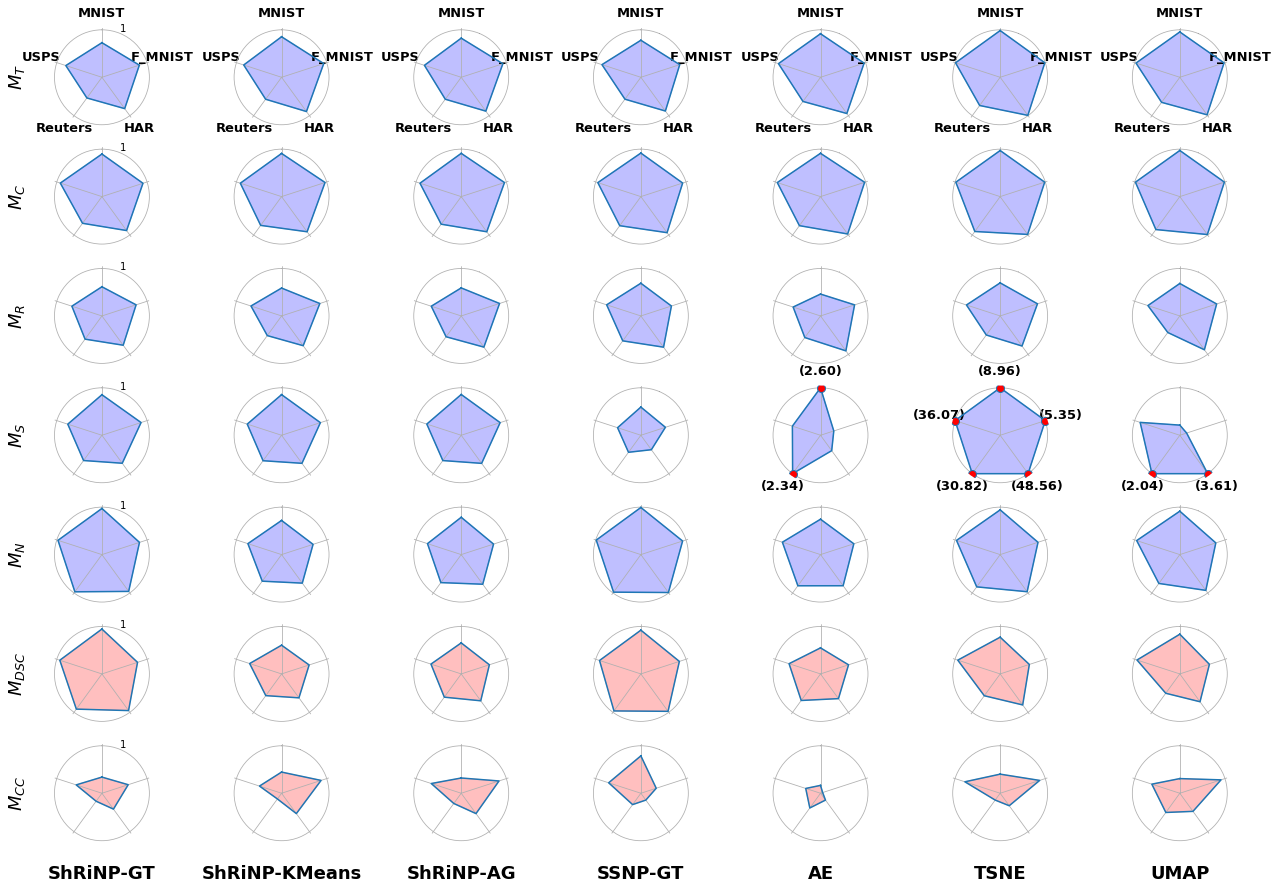

In [17]:
n_rows = len(metrics)
n_cols = len(algs)
angles = np.linspace(0, 2 * np.pi, len(datasets), endpoint=False).tolist()
angles += angles[:1]

fig, axes = plt.subplots(n_rows, n_cols, sharey=True, subplot_kw=dict(polar=True), figsize=(22, 15))

for i, group_name in enumerate(product(metrics, algs)):
    row, col = divmod(i, n_cols)
    ax: matplotlib.projections.polar.PolarAxes = axes[row][col]
    ax.set_rgrids([0, 1])
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    group = grouped2.get_group(group_name)
    vals = group[datasets].to_numpy()[0]

    # prevent high stress values from making the plot unreadable
    star_indices = np.argwhere(vals > 1.0).ravel()
    clipped_vals = vals.copy()
    clipped_vals[star_indices] = 1.0
    plot_star(
        axes[row][col],
        clipped_vals.tolist(),
        star_indices=star_indices,
        fillcolor="red" if group_name[0] in ("CC_train", "DSC_train") else "blue",
    )

    for label in ax.get_xticklabels():
        label.set_fontweight("bold")
    ax.set_xticklabels(ax.get_xticks(), rotation=30)
    if row == 0 or len(star_indices) > 0:
        tick_labels = map(lambda el: pretty_datasets[el], datasets)
        if len(star_indices) > 0:
            tick_labels = [
                "" if _i not in star_indices else f"({v:.2f})"
                for _i, tl, v in zip(count(), tick_labels, vals.ravel().tolist())
            ]
        ax.set_thetagrids(np.degrees(angles[:-1]), tick_labels)
        ax.tick_params("x", labelsize=13)
    else:
        ax.set_thetagrids(np.degrees(angles[:-1]), ["", "", "", "", ""])

    if col == 0:
        ax.set_ylabel(
            f"$M_{{{short_metrics[group_name[0]]}}}$",
            labelpad=25,
            fontsize=18,
            fontweight="bold",
            loc="center",
        )
    else:
        ax.tick_params(axis="y", labelsize=0)
    if row == n_rows - 1:
        ax.set_xlabel(group_name[1], labelpad=20, fontsize=18, fontweight="bold", loc="center")
    ax.spines["polar"].set_color("#FFFFFF00")
# plt.subplots_adjust(wspace=0.4, hspace=0.4)
# plt.tight_layout()
